# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

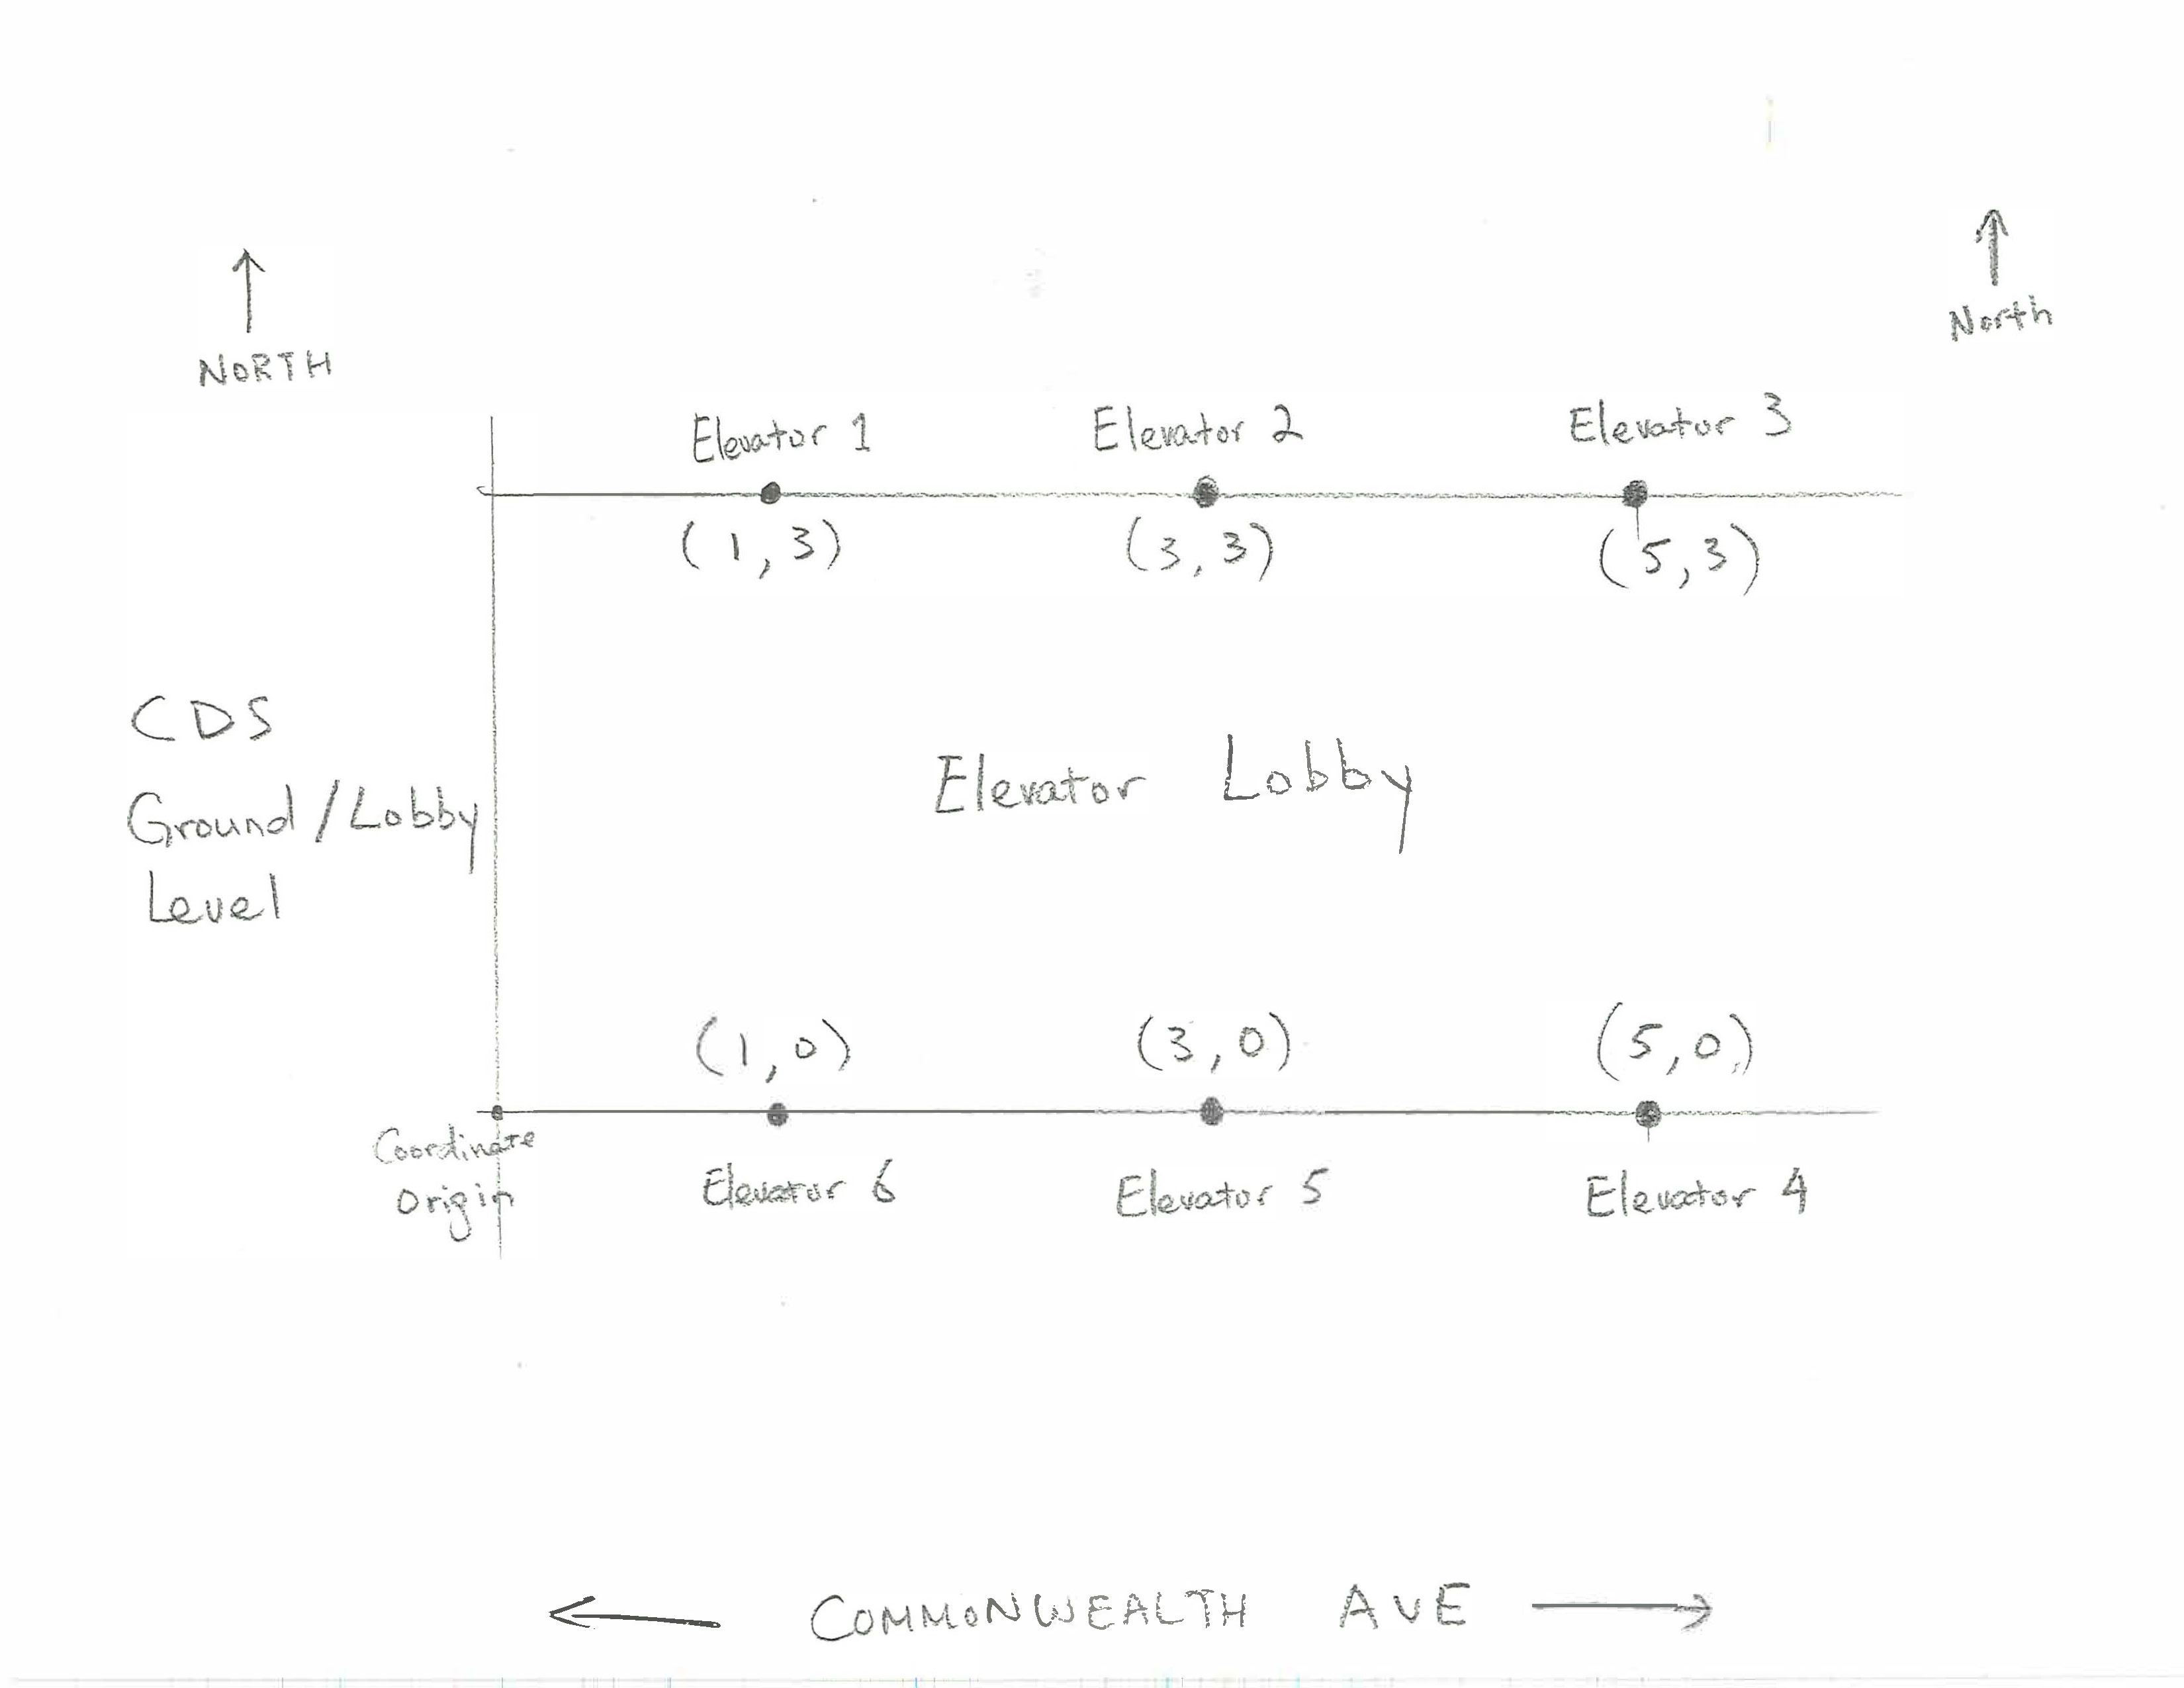

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

Considering that the next elevator has an equal chance to arrive then it would be best to stand in the middle off the plane which would be (3, 1.5). This is because you would have the least total distance to each of the elevators when you stand at this point.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

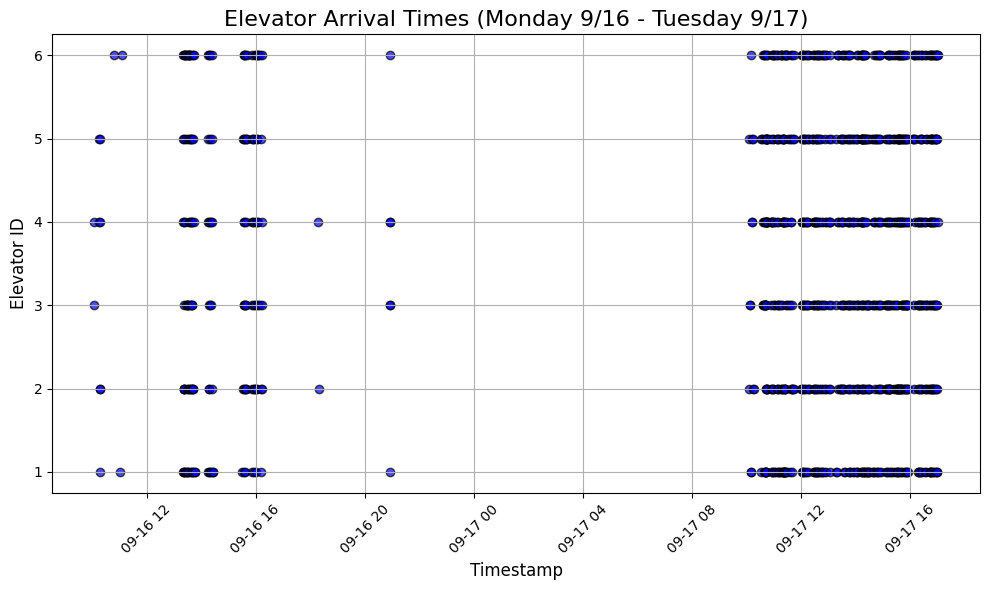

In [3]:
# Code for question 1:
import matplotlib.pyplot as plt
import pandas as pd

def make_plot():
    df = pd.read_csv('/Users/kenneytran/kenney02-assignment-1/Data1.csv')  # Replace 'elevator_data.csv' with the actual file name

    # Convert 'Timestamp' column to datetime format
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Filter the data for a specific time range (Monday 9/16 - Tuesday 9/17)
    start_time = '2024-09-16'
    end_time = '2024-09-17 23:59:59'
    mask = (df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)
    filtered_df = df[mask]

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_df['Timestamp'], filtered_df['Elevator ID'], color='b', alpha=0.7, edgecolor='k')

    # Set plot labels and title
    plt.title("Elevator Arrival Times (Monday 9/16 - Tuesday 9/17)", fontsize=16)
    plt.xlabel("Timestamp", fontsize=12)
    plt.ylabel("Elevator ID", fontsize=12)
    plt.grid(True)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

make_plot()

The scatter plot of elevator arrival times shows distinct patterns. There are notable peaks in activity during morning rush hours, particularly on 09/17, with consistent arrivals throughout the day and a drop in usage from midnight to 8 AM. High-density clusters around midday on 09/16 and 09/17 indicate increased demand during lunch breaks. Overall, the usage of the six elevators is fairly balanced, suggesting predictable peaks in demand that could guide future scheduling and maintenance optimizations.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [22]:
import pandas as pd

# Load the data
df = pd.read_csv('/Users/kenneytran/kenney02-assignment-1/Data1.csv')

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter data to include only arrivals between 9/16/2024 and 9/17/2024
start_date = '2024-09-16'
end_date = '2024-09-18'  # Include the entire day of 9/17
df_filtered = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] < end_date)].copy()

# Extract the hour from each timestamp (optional if you need it)
df_filtered.loc[:, 'Hour'] = df_filtered['Timestamp'].dt.hour

# Define a threshold for gaps in data collection (e.g., 1 hour = 3600 seconds)
gap_threshold = 3600  # You can adjust this value based on your data

# Initialize a dictionary to store total time (with gaps) for each elevator
adjusted_total_time = {}

# Get the unique elevator IDs
elevator_ids = df_filtered['Elevator ID'].unique()

for elevator in elevator_ids:
    # Filter data for the specific elevator
    elevator_data = df_filtered[df_filtered['Elevator ID'] == elevator]
    
    # Calculate the time differences between consecutive arrivals
    time_diffs = elevator_data['Timestamp'].diff().dt.total_seconds().fillna(0)
    
    # Identify gaps larger than the threshold
    gaps = time_diffs[time_diffs > gap_threshold]
    
    # Total time for this elevator without gaps
    total_time_with_gaps = (elevator_data['Timestamp'].max() - elevator_data['Timestamp'].min()).total_seconds()
    
    # Subtract the total duration of the gaps from the total observation time
    adjusted_total_time[elevator] = total_time_with_gaps - gaps.sum()

# Count the number of arrivals for each elevator
arrival_counts = {elevator: df_filtered[df_filtered['Elevator ID'] == elevator]['Timestamp'].count() for elevator in elevator_ids}

# Create a DataFrame for the summary
summary_df = pd.DataFrame({
    'Elevator ID': elevator_ids,
    'Total time (seconds)': [adjusted_total_time[elevator] for elevator in elevator_ids],
    '# of arrivals': [arrival_counts[elevator] for elevator in elevator_ids],
})

# Calculate average frequency (arrivals per second)
summary_df['Average frequency'] = summary_df['# of arrivals'] / summary_df['Total time (seconds)']

# Sort by 'Elevator ID'
summary_df = summary_df.sort_values(by='Elevator ID')

# Display the sorted summary table
print(summary_df)


   Elevator ID  Total time (seconds)  # of arrivals  Average frequency
3            1               33608.0            155           0.004612
4            2               31196.0            162           0.005193
1            3               30790.0            170           0.005521
0            4               31483.0            168           0.005336
2            5               30959.0            167           0.005394
5            6               32016.0            159           0.004966


**Answer:** Well based on the table I have calculated for the average frequencies of all the elevators I would like to believe that it would be best to stand closer to the elevators with the highest average frequencies being elevator 3,4,5. This would allow us to have a higher possibility of being closer to the elevator that would arrive next.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 33608.0 | 31196.0 | 30790.0 | 31483.0 | 30959.0 |32016.0 |
| Number of arrivals | 155 | 155 | 170 | 168 | 167 |159 |
| Average frequency (arrivals per second) | 0.004612 | 0.005193 | 0.005521 | 0.005336 | 0.005394 |0.004966 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [25]:
import pandas as pd
data = {
    'Elevator ID': [1, 2, 3, 4, 5, 6],
    'Average frequency': [0.004612, 0.005193, 0.005521, 0.005336, 0.005394, 0.004966]
}

df = pd.DataFrame(data)

# Sum all the frequencies
total_frequency = df['Average frequency'].sum()

# Calculate and print the probability for each elevator
df['Probability'] = df['Average frequency'] / total_frequency

# Display the results
print(df[['Elevator ID', 'Average frequency', 'Probability']])
print(df['Probability'].sum())


   Elevator ID  Average frequency  Probability
0            1           0.004612     0.148669
1            2           0.005193     0.167397
2            3           0.005521     0.177970
3            4           0.005336     0.172007
4            5           0.005394     0.173877
5            6           0.004966     0.160080
0.9999999999999999


**Answer:** For this I calcuated the probabilities of the elevators by summing all the frequencies to get the avarege frequency of an elevator arriving. Then I calculated the individual probabilities using the total. I think this would be more informative than using the total number of arrivals because the frequencies would help us better understand the general usage patterns of the elevators. If we were to use the total number of arrivals it would be better for actual usage in a given time. 

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.148669 | 0.167397 | 0.177970 | 0.172007 | 0.173877 |0.160080 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [36]:
import numpy as np

# Define the elevator coordinates and arrival probabilities
elevator_coords = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

arrival_probs = {
    1: 0.148669,
    2: 0.167397,
    3: 0.177970,
    4: 0.172007,
    5: 0.173877,
    6: 0.160080
}

# Calculate the weighted average for the optimal waiting position
x_optimal = 0
y_optimal = 0

for elevator_id, (x, y) in elevator_coords.items():
    prob = arrival_probs[elevator_id]
    x_optimal += x * prob
    y_optimal += y * prob

# Print the optimal waiting coordinates
print(f"The optimal waiting position is at: ({x_optimal:.2f}, {y_optimal:.2f})")


The optimal waiting position is at: (3.08, 1.48)


**Answer:** to find the optimal distance I applied a weighted average so we can determine the most optimal coordinate for x and y. To do tghis we take the sum of all of the elevators coordinates multiplied by its arrival probability. The resulting coordinates would give us the optimal x and y coordinated according to the probabilities we calculated.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [38]:
import numpy as np
import pandas as pd

# Coordinates for the elevators, hard-coded
elevator_coordinates = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

def euclidean_distance(coord1, coord2):
    """Calculates the Euclidean distance between two points."""
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def get_average_walk_distance(data, coordinate):
    # Read the data from the file (assuming 'Elevator ID' is the column name)
    df = pd.read_csv(data)

    # Initialize total distance and counter
    total_distance = 0
    total_arrivals = 0
    
    # Iterate through each elevator ID in the data
    for elevator_id in df['Elevator ID']:
        # Get the elevator's coordinates from the hardcoded dictionary
        elevator_coord = elevator_coordinates.get(elevator_id, None)
        distance = euclidean_distance(coordinate, elevator_coord)
        total_distance += distance
        total_arrivals += 1
    
    average_walk_distance = total_distance / total_arrivals
    return average_walk_distance

# Example usage: assuming the data is stored in 'elevator_data.csv'
# and we are waiting at coordinate (3, 1.5)
print(f"Average walk distance hypothesis: {get_average_walk_distance('/Users/kenneytran/kenney02-assignment-1/Data1.csv', (3, 1.5))}")
print(f"Average walk distance optimal: {get_average_walk_distance('/Users/kenneytran/kenney02-assignment-1/Data1.csv', (3.08, 1.48))}")



Average walk distance hypothesis: 2.1641975308641976
Average walk distance optimal: 2.163876755820482


**Answer:** 

Average walk distance hypothesis: 2.1641975308641976 

Average walk distance optimal: 2.163876755820482

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.1641975308641976 |   2.163793103448276 |
|Smart position (Question 5) | 2.163876755820482 |   2.1637669823448986 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** 

Yes! It seems like my optimal place to stand seems to have a lower average travel distance when compared to my hypothesis considering that every elevator had equal probability of arriving. Though the difference might be small the average distance is still lower than the the hypothesized coordinate!

In [42]:
print(f"Average walk distance hypothesis: {get_average_walk_distance('/Users/kenneytran/kenney02-assignment-1/Data2.csv', (3, 1.5))}")
print(f"Average walk distance optimal: {get_average_walk_distance('/Users/kenneytran/kenney02-assignment-1/Data2.csv', (3.08, 1.48))}")

Average walk distance hypothesis: 2.163793103448276
Average walk distance optimal: 2.1637669823448986
